In [29]:
from drought.data.pipeline import *
from sklearn.cluster import KMeans

The goal here is to build an unsupervised clustering model which can cluster geographic regions based on climatic variables. 

In [68]:
shape = get_gpd_polygons()

In [48]:
monthly = get_monthly_means_per_polygon()
cluster_input = monthly.groupby(["polygon_id"]).mean()
cluster_input

,month,year,pai,precipitation,temperature,radiation
polygon_id,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07


In [83]:
def ecosystem_clustering(df, feature_cols):
    km = KMeans(n_clusters=2)
    km.fit(df[feature_cols])
    output = df.assign(cluster=km.predict(df[feature_cols]))

    return output

In [84]:
result = ecosystem_clustering(cluster_input, ["temperature", "precipitation", "radiation"])
result

/home/og309/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,month,year,pai,precipitation,temperature,radiation,cluster
polygon_id,,,,,,,
1,6.342857,2020.314286,3.555716,293.765893,28.775501,1.395512e+07,0
2,6.394737,2020.342105,3.313128,263.506760,28.734562,1.420633e+07,0
3,6.096774,2020.354839,3.266357,251.702826,28.469306,1.392554e+07,0
4,6.384615,2020.384615,3.504819,235.860376,27.832612,1.484121e+07,0
5,6.384615,2020.384615,3.001037,172.098428,28.273038,1.589685e+07,1
6,6.384615,2020.384615,0.779162,116.032661,32.536969,1.703984e+07,1
7,6.384615,2020.384615,0.463933,68.682771,33.269556,1.771369e+07,1
8,6.384615,2020.384615,0.986440,64.882448,29.343542,1.502093e+07,0


In [85]:
shape = shape.set_index(result.index)
shape = shape.assign(cluster = result["cluster"])

<AxesSubplot: >

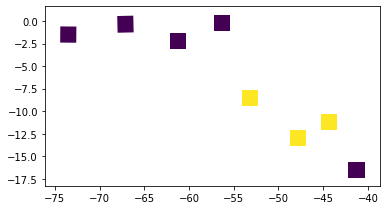

In [86]:
shape.plot(column = shape["cluster"])